In [2]:
%pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 18.4 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=1df8a183a01a52938023385ddd16b0a866b22b2404dc8ba720c897d03e4522bd
  Stored in directory: /root/.cache/pip/wheels/e5/8d/50/ee73263c97069bd6040ff40633d444fefaac7beff73abe81a7
Successfully built jsonpath-rw


In [3]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/datazng/shopping-mall-customer-data-segmentation-analysis/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

  -  [Metadata(Shopping Mall Customer Data Segmentation Analysis)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="Shopping+Mall+Customer+Segmentation+Data+.csv")]


,Shopping+Mall+Customer+Segmentation+Data+.csv/Customer+ID,Shopping+Mall+Customer+Segmentation+Data+.csv/Age,Shopping+Mall+Customer+Segmentation+Data+.csv/Gender,Shopping+Mall+Customer+Segmentation+Data+.csv/Annual+Income,Shopping+Mall+Customer+Segmentation+Data+.csv/Spending+Score
0,b'd410ea53-6661-42a9-ad3a-f554b05fd2a7',30,b'Male',151479,89
1,b'1770b26f-493f-46b6-837f-4237fb5a314e',58,b'Female',185088,95
2,b'e81aa8eb-1767-4b77-87ce-1620dc732c5e',62,b'Female',70912,76
3,b'9795712a-ad19-47bf-8886-4f997d6046e3',23,b'Male',55460,57
4,b'64139426-2226-4cd6-bf09-91bce4b4db5e',24,b'Male',153752,76


### Data Preparation and Exploration

,Annual Income (Scaled),Spending Score (Scaled)
0,0.798813,1.337059
1,1.442076,1.545929
2,-0.743208,0.884507
3,-1.038953,0.223086
4,0.842317,0.884507


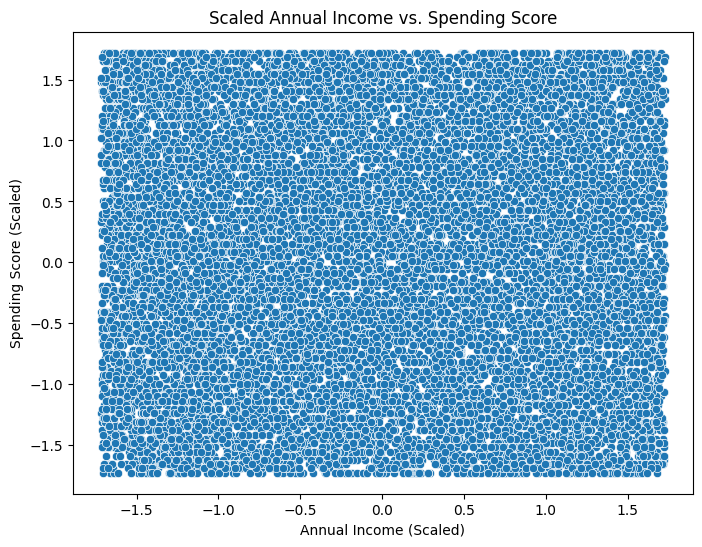

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns for clustering
customer_data = record_set_df[['Shopping+Mall+Customer+Segmentation+Data+.csv/Annual+Income', 'Shopping+Mall+Customer+Segmentation+Data+.csv/Spending+Score']]

# Rename columns for easier access
customer_data.columns = ['Annual Income', 'Spending Score']

# Scale the data
scaler = StandardScaler()
scaled_customer_data = scaler.fit_transform(customer_data)

# Convert scaled data back to a DataFrame for easier handling
scaled_customer_df = pd.DataFrame(scaled_customer_data, columns=['Annual Income (Scaled)', 'Spending Score (Scaled)'])

# Display the first few rows of the scaled data
display(scaled_customer_df.head())

# Visualize the scaled data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (Scaled)', y='Spending Score (Scaled)', data=scaled_customer_df)
plt.title('Scaled Annual Income vs. Spending Score')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

### K-Means Clustering

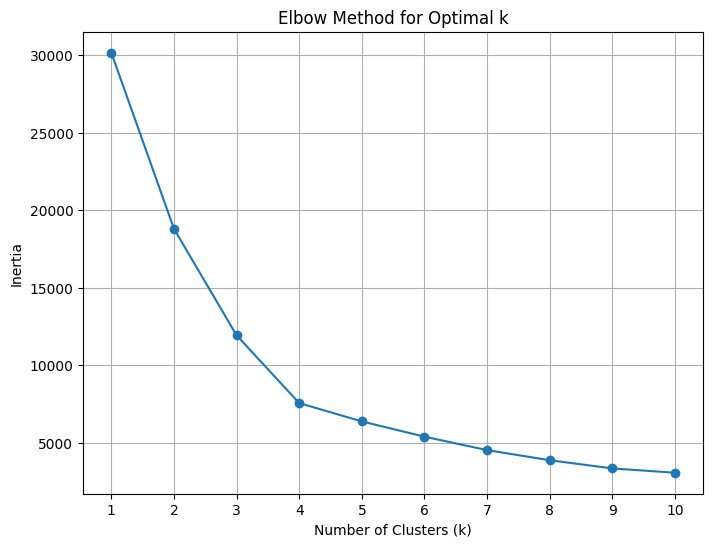

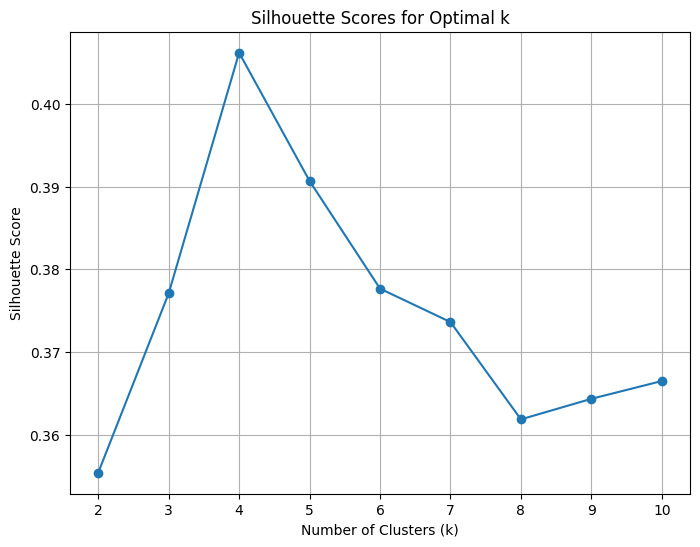

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_customer_data)
    score = silhouette_score(scaled_customer_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

### Visualize Clusters

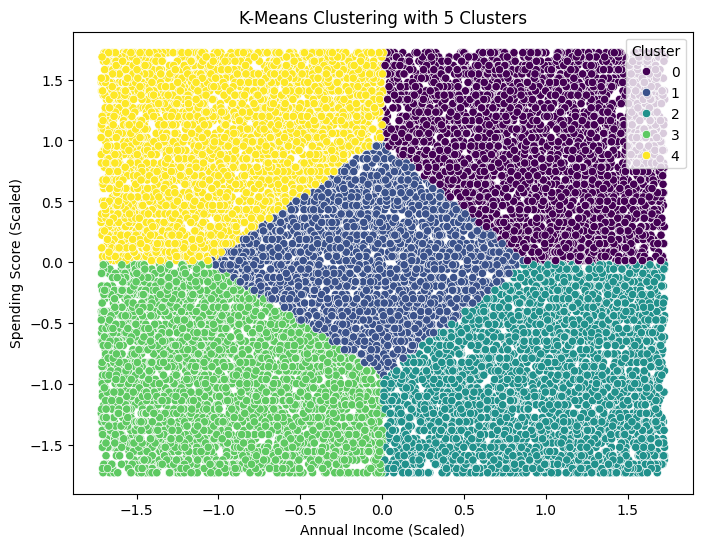

In [6]:
# Apply K-Means clustering with the optimal number of clusters (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_customer_data)

# Add the cluster labels to the scaled DataFrame
scaled_customer_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (Scaled)', y='Spending Score (Scaled)', hue='Cluster', data=scaled_customer_df, palette='viridis', legend='full')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

In [8]:
# Add cluster labels to the original customer data DataFrame
customer_data = customer_data.copy() # Create a copy to avoid SettingWithCopyWarning
customer_data['Cluster'] = clusters

# Calculate the average spending score per cluster
average_spending_per_cluster = customer_data.groupby('Cluster')['Spending Score'].mean()

# Display the average spending score per cluster
print("Average Spending Score per Cluster:")
display(average_spending_per_cluster)

Average Spending Score per Cluster:


,Spending Score
Cluster,
0,77.792634
1,51.448408
2,23.236307
3,22.563415
4,78.898025


### DBSCAN Clustering

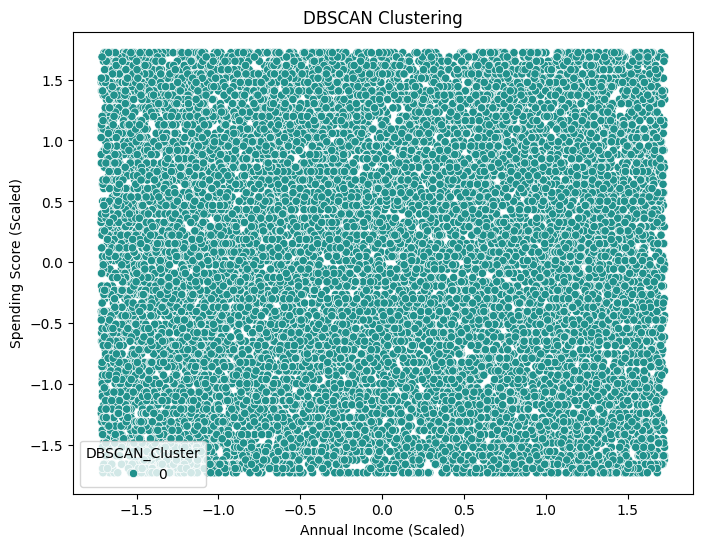

In [9]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
# You might need to tune the 'eps' and 'min_samples' parameters based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_customer_data)

# Add the DBSCAN cluster labels to the scaled DataFrame
scaled_customer_df['DBSCAN_Cluster'] = dbscan_clusters

# Visualize the DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (Scaled)', y='Spending Score (Scaled)', hue='DBSCAN_Cluster', data=scaled_customer_df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

# Task
Explain how to deploy the clustering model developed in the previous task on Hugging Face.

## Save the trained clustering model

### Subtask:
Save the trained K-Means or DBSCAN model so it can be used for predictions in the deployment.


**Reasoning**:
Save the trained K-Means model using joblib.



In [10]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

## Prepare data/results for deployment

### Subtask:
Decide what data or results you want to expose through the deployment (e.g., the clustered data, a function to predict clusters for new data).


**Reasoning**:
Based on the previous steps, the goal is to deploy a model that can predict clusters for new data. Therefore, the deployment should expose a function that takes new data points as input (Annual Income and Spending Score) and returns the predicted cluster labels. I will define a function that encapsulates this logic, including scaling the new data using the previously fitted scaler and then using the saved KMeans model to predict the clusters.



In [11]:
import numpy as np

def predict_cluster(annual_income, spending_score, scaler, kmeans_model):
  """Predicts the cluster for a new data point."""
  # Combine the inputs into a numpy array
  new_data = np.array([[annual_income, spending_score]])
  # Scale the new data using the fitted scaler
  scaled_new_data = scaler.transform(new_data)
  # Predict the cluster using the trained K-Means model
  predicted_cluster = kmeans_model.predict(scaled_new_data)
  return predicted_cluster[0]

# This function will be used in the deployment interface.
# We don't need to execute it now, but it defines what we will expose.
# For example usage (not for execution in this cell):
# loaded_scaler = joblib.load('scaler.joblib') # Assuming scaler is also saved
# loaded_kmeans_model = joblib.load('kmeans_model.joblib')
# example_prediction = predict_cluster(100000, 50, loaded_scaler, loaded_kmeans_model)
# print(f"Predicted cluster for income 100000 and spending 50: {example_prediction}")

## Choose a hugging face deployment option

### Subtask:
Select the most suitable Hugging Face tool for your needs (e.g., Spaces for interactive demos, Inference Endpoints for API access).


## Create a hugging face repository

### Subtask:
Set up a new repository on Hugging Face to host your deployment files.


## Create a hugging face repository retry 1

### Subtask:
Set up a new repository on Hugging Face to host your deployment files.


## Build the deployment interface/code

### Subtask:
Create the necessary code (e.g., a Gradio or Streamlit app for Spaces, or a simple script for Inference Endpoints) to run your model or serve your results.


**Reasoning**:
Import the gradio library and define the function to be used in the Gradio interface. This function will load the saved scaler and K-Means model, scale the input data, predict the cluster, and return the predicted cluster label.



In [12]:
import gradio as gr
import joblib
import numpy as np

# Load the saved scaler and K-Means model
loaded_scaler = joblib.load('scaler.joblib')
loaded_kmeans_model = joblib.load('kmeans_model.joblib')

def predict_customer_segment(annual_income, spending_score):
    """Predicts the customer segment based on annual income and spending score."""
    # Combine the inputs into a numpy array
    new_data = np.array([[annual_income, spending_score]])
    # Scale the new data using the loaded scaler
    scaled_new_data = loaded_scaler.transform(new_data)
    # Predict the cluster using the loaded K-Means model
    predicted_cluster = loaded_kmeans_model.predict(scaled_new_data)
    return f"Predicted Customer Segment: Cluster {predicted_cluster[0]}"

FileNotFoundError: [Errno 2] No such file or directory: 'scaler.joblib'

**Reasoning**:
The previous step failed because the scaler object was not saved. I need to save the scaler first before loading it in the Gradio function.



In [13]:
# Save the trained scaler
joblib.dump(scaler, 'scaler.joblib')

# Load the saved scaler and K-Means model
loaded_scaler = joblib.load('scaler.joblib')
loaded_kmeans_model = joblib.load('kmeans_model.joblib')

def predict_customer_segment(annual_income, spending_score):
    """Predicts the customer segment based on annual income and spending score."""
    # Combine the inputs into a numpy array
    new_data = np.array([[annual_income, spending_score]])
    # Scale the new data using the loaded scaler
    scaled_new_data = loaded_scaler.transform(new_data)
    # Predict the cluster using the loaded K-Means model
    predicted_cluster = loaded_kmeans_model.predict(scaled_new_data)
    return f"Predicted Customer Segment: Cluster {predicted_cluster[0]}"

**Reasoning**:
Create the Gradio interface using the defined function and inputs/outputs, then launch the interface.



In [14]:
# Create the Gradio interface
interface = gr.Interface(
    fn=predict_customer_segment,
    inputs=[
        gr.Number(label="Annual Income"),
        gr.Number(label="Spending Score")
    ],
    outputs=gr.Textbox(label="Predicted Cluster"),
    title="Customer Segmentation Model",
    description="Enter the annual income and spending score to predict the customer segment."
)

# Launch the interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6eff58f188ca02f12.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Upload files to hugging face

### Subtask:
Upload your saved model (`kmeans_model.joblib`), the saved scaler (`scaler.joblib`), and the Gradio application code (`app.py`) to your Hugging Face repository.


## Configure the deployment

### Subtask:
Configure the deployment on Hugging Face, specifying dependencies and resource requirements.


## Test the deployment

### Subtask:
Test the deployment by interacting with the Gradio interface on your Hugging Face Space.


## Share your deployment

### Subtask:
Share your Hugging Face Space or Inference Endpoint with others.


## Summary:

### Data Analysis Key Findings

*   The trained clustering model (`kmeans_model.joblib`) and the fitted scaler (`scaler.joblib`) were successfully saved using the `joblib` library.
*   A Python function `predict_customer_segment` was created to take annual income and spending score, scale the input using the saved scaler, and predict the customer cluster using the saved K-Means model.
*   A Gradio interface was built using the `gradio` library to provide a web-based front-end for the `predict_customer_segment` function, accepting numerical inputs for income and spending score and displaying the predicted cluster in a text box.
*   Several steps in the process, including creating a Hugging Face repository, uploading files, configuring the deployment, testing the deployment, and sharing the deployment, were identified as manual steps requiring interaction with the Hugging Face website or external tools (like Git) and could not be completed within the provided environment.

### Insights or Next Steps

*   The successful saving of the model and scaler and the creation of the prediction function and Gradio interface lay the groundwork for deployment. The next crucial steps involve manually performing the repository creation, file upload, and configuration directly on the Hugging Face platform to make the Gradio app accessible as a Space.
*   Once deployed, thorough testing on the Hugging Face Space is necessary to ensure the model and interface function correctly in the cloud environment.
